<a href="https://colab.research.google.com/github/Olayile/Climate_change_belief/blob/master/global_warming_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns

## Desription 

- 2 News: the tweet links to factual news about climate change 
- 1 Pro: the tweet supports the belief of man-made climate change 
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/twee_analysis_EDSA/train.csv')
test = pd.read_csv('/content/drive/MyDrive/twee_analysis_EDSA/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/twee_analysis_EDSA/sample_submission.csv')


In [ ]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

<Figure size 3600x3600 with 0 Axes>

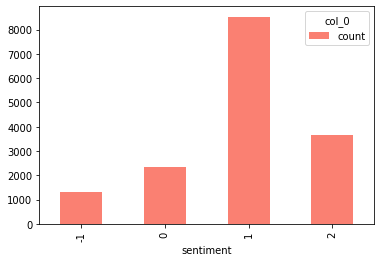

In [ ]:
# Checking  sentiment

sent = pd.crosstab(index = train['sentiment'], columns = 'count')
plt.figure(figsize=(50,50))
sent.plot.bar(color = 'salmon')

In [ ]:
# cleaning tweets

def clean_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"[^a-zA-Z]", " ")
    df[text_field] = df[text_field].str.replace(r"http\S+", "") #remove https
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower() # change tweet ro lower case
    return df

In [ ]:

train_clean = clean_text(train, 'message' )
test_clean = clean_text(test, "message")

In [ ]:
train_clean

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon di...,625221
1,1,it s not like we lack evidence of anthropogeni...,126103
2,2,rt rawstory researchers say we have three ye...,698562
3,1,todayinmaker wired was a pivotal year...,573736
4,1,rt soynoviodetodas it s and a racist ...,466954
...,...,...,...
15814,1,rt ezlusztig they took down the material on ...,22001
15815,2,rt washingtonpost how climate change could b...,17856
15816,0,notiven rt nytimesworld what does trump act...,384248
15817,-1,rt sara smiles hey liberals the climate chan...,819732


In [ ]:
# explore relationship between existence and tweet length
for df in [train_clean, test_clean]:
  df['tweet_len'] = df['message'].apply(len)

In [ ]:
train_clean

,sentiment,message,tweetid,tweet_len
0,1,polyscimajor epa chief doesn t think carbon di...,625221,135
1,1,it s not like we lack evidence of anthropogeni...,126103,62
2,2,rt rawstory researchers say we have three ye...,698562,130
3,1,todayinmaker wired was a pivotal year...,573736,94
4,1,rt soynoviodetodas it s and a racist ...,466954,122
...,...,...,...,...
15814,1,rt ezlusztig they took down the material on ...,22001,135
15815,2,rt washingtonpost how climate change could b...,17856,114
15816,0,notiven rt nytimesworld what does trump act...,384248,128
15817,-1,rt sara smiles hey liberals the climate chan...,819732,128


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


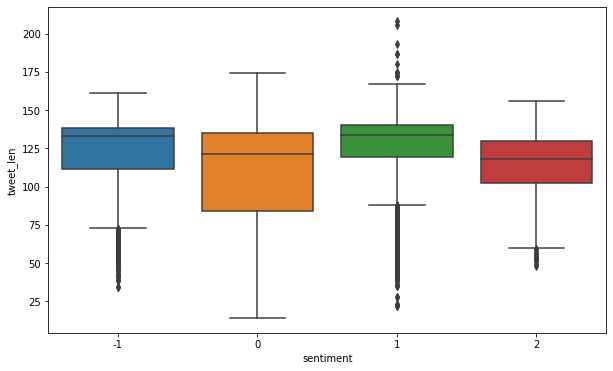

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(train_clean['sentiment'], train_clean['tweet_len'])

In [ ]:
train_clean.corr()

,sentiment,tweetid,tweet_len
sentiment,1.000000,-0.003758,0.005240
tweetid,-0.003758,1.000000,0.006307
tweet_len,0.005240,0.006307,1.000000


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

for df in [train_clean, test_clean]:
  df['tokens'] = df['message'].apply(nltk.word_tokenize) 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train_clean.head()

,sentiment,message,tweetid,tweet_len,tokens
0,1,polyscimajor epa chief doesn t think carbon di...,625221,135,"[polyscimajor, epa, chief, doesn, t, think, ca..."
1,1,it s not like we lack evidence of anthropogeni...,126103,62,"[it, s, not, like, we, lack, evidence, of, ant..."
2,2,rt rawstory researchers say we have three ye...,698562,130,"[rt, rawstory, researchers, say, we, have, thr..."
3,1,todayinmaker wired was a pivotal year...,573736,94,"[todayinmaker, wired, was, a, pivotal, year, i..."
4,1,rt soynoviodetodas it s and a racist ...,466954,122,"[rt, soynoviodetodas, it, s, and, a, racist, s..."


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['rt', 'link', 'un', "n't"])

for df in [train_clean, test_clean]:
  df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if not item in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_clean

,sentiment,message,tweetid,tweet_len,tokens
0,1,polyscimajor epa chief doesn t think carbon di...,625221,135,"[polyscimajor, epa, chief, think, carbon, diox..."
1,1,it s not like we lack evidence of anthropogeni...,126103,62,"[like, lack, evidence, anthropogenic, global, ..."
2,2,rt rawstory researchers say we have three ye...,698562,130,"[rawstory, researchers, say, three, years, act..."
3,1,todayinmaker wired was a pivotal year...,573736,94,"[todayinmaker, wired, pivotal, year, war, clim..."
4,1,rt soynoviodetodas it s and a racist ...,466954,122,"[soynoviodetodas, racist, sexist, climate, cha..."
...,...,...,...,...,...
15814,1,rt ezlusztig they took down the material on ...,22001,135,"[ezlusztig, took, material, global, warming, l..."
15815,2,rt washingtonpost how climate change could b...,17856,114,"[washingtonpost, climate, change, could, break..."
15816,0,notiven rt nytimesworld what does trump act...,384248,128,"[notiven, nytimesworld, trump, actually, belie..."
15817,-1,rt sara smiles hey liberals the climate chan...,819732,128,"[sara, smiles, hey, liberals, climate, change,..."


In [ ]:
#Using stemming for normalisation 
from nltk.stem.porter import PorterStemmer
porter  = PorterStemmer()

for df in [train_clean, test_clean]:
  df['stems'] = df['tokens'].apply(lambda x: [porter.stem(t) for t in x])

In [ ]:
train_clean

,sentiment,message,tweetid,tweet_len,tokens,stems
0,1,polyscimajor epa chief doesn t think carbon di...,625221,135,"[polyscimajor, epa, chief, think, carbon, diox...","[polyscimajor, epa, chief, think, carbon, diox..."
1,1,it s not like we lack evidence of anthropogeni...,126103,62,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evid, anthropogen, global, warm]"
2,2,rt rawstory researchers say we have three ye...,698562,130,"[rawstory, researchers, say, three, years, act...","[rawstori, research, say, three, year, act, cl..."
3,1,todayinmaker wired was a pivotal year...,573736,94,"[todayinmaker, wired, pivotal, year, war, clim...","[todayinmak, wire, pivot, year, war, climat, c..."
4,1,rt soynoviodetodas it s and a racist ...,466954,122,"[soynoviodetodas, racist, sexist, climate, cha...","[soynoviodetoda, racist, sexist, climat, chang..."
...,...,...,...,...,...,...
15814,1,rt ezlusztig they took down the material on ...,22001,135,"[ezlusztig, took, material, global, warming, l...","[ezlusztig, took, materi, global, warm, lgbt, ..."
15815,2,rt washingtonpost how climate change could b...,17856,114,"[washingtonpost, climate, change, could, break...","[washingtonpost, climat, chang, could, break, ..."
15816,0,notiven rt nytimesworld what does trump act...,384248,128,"[notiven, nytimesworld, trump, actually, belie...","[notiven, nytimesworld, trump, actual, believ,..."
15817,-1,rt sara smiles hey liberals the climate chan...,819732,128,"[sara, smiles, hey, liberals, climate, change,...","[sara, smile, hey, liber, climat, chang, crap,..."


In [ ]:
# Join all the stemmed words to sentences
for df in [train_clean, test_clean]:  
  df['sentences'] = df['stems'].apply(lambda x: [" ".join(w for w in x)])


In [ ]:
test_clean

,message,tweetid,tweet_len,tokens,stems,sentences
0,europe will now be looking to china to make su...,169760,116,"[europe, looking, china, make, sure, alone, fi...","[europ, look, china, make, sure, alon, fight, ...",[europ look china make sure alon fight climat ...
1,combine this with the polling of staffers re c...,35326,127,"[combine, polling, staffers, climate, change, ...","[combin, poll, staffer, climat, chang, women, ...",[combin poll staffer climat chang women right ...
2,the scary unimpeachable evidence that climate...,224985,134,"[scary, unimpeachable, evidence, climate, chan...","[scari, unimpeach, evid, climat, chang, alread...",[scari unimpeach evid climat chang alreadi co ...
3,karoli morgfair osborneink dailykos putin...,476263,136,"[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailyko, putin,...",[karoli morgfair osborneink dailyko putin got ...
4,rt fakewillmoore female orgasms cause globa...,872928,79,"[fakewillmoore, female, orgasms, cause, global...","[fakewillmoor, femal, orgasm, caus, global, wa...",[fakewillmoor femal orgasm caus global warm sa...
...,...,...,...,...,...,...
10541,rt brittanybohrer brb writing a poem about ...,895714,135,"[brittanybohrer, brb, writing, poem, climate, ...","[brittanybohr, brb, write, poem, climat, chang...",[brittanybohr brb write poem climat chang clim...
10542,the year climate change came home durin...,875167,132,"[year, climate, change, came, home, hottest, y...","[year, climat, chang, came, home, hottest, yea...",[year climat chang came home hottest year reco...
10543,rt loop vanuatu pacific countries positive a...,78329,132,"[loop, vanuatu, pacific, countries, positive, ...","[loop, vanuatu, pacif, countri, posit, fiji, l...",[loop vanuatu pacif countri posit fiji lead gl...
10544,rt xanria you re so hot you must be t...,867455,110,"[xanria, hot, must, cause, global, warming, al...","[xanria, hot, must, caus, global, warm, aldubl...",[xanria hot must caus global warm aldublaborof...


In [ ]:
for df in [train_clean, test_clean]:
  df['sentences'] = df['sentences'].apply(str)
x_train = train_clean['sentences']
y_train  = train_clean['sentiment']

x_test = test_clean['sentences']


In [ ]:
x_train

0        ['polyscimajor epa chief think carbon dioxid m...
1               ['like lack evid anthropogen global warm']
2        ['rawstori research say three year act climat ...
3        ['todayinmak wire pivot year war climat chang ...
4        ['soynoviodetoda racist sexist climat chang de...
                               ...                        
15814    ['ezlusztig took materi global warm lgbt right...
15815    ['washingtonpost climat chang could break mill...
15816    ['notiven nytimesworld trump actual believ cli...
15817    ['sara smile hey liber climat chang crap hoax ...
15818    ['chet cannon kurteichenwald climat chang equa...
Name: sentences, Length: 15819, dtype: object

In [ ]:
y_train

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

In [ ]:
#use BOW to extract features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()


x_train_count = count_vectorizer.fit_transform(x_train)
x_test_count = count_vectorizer.transform(x_test)

print(x_train_count)

  (0, 18424)	1
  (0, 6878)	1
  (0, 3616)	1
  (0, 23633)	1
  (0, 3136)	1
  (0, 5561)	1
  (0, 14344)	1
  (0, 3255)	1
  (0, 8873)	1
  (0, 25891)	1
  (0, 25848)	1
  (0, 4079)	1
  (0, 27321)	1
  (0, 25416)	1
  (0, 14572)	1
  (1, 8873)	1
  (1, 25891)	1
  (1, 13746)	1
  (1, 13269)	1
  (1, 7133)	1
  (1, 998)	1
  (2, 4079)	2
  (2, 19628)	1
  (2, 20018)	1
  (2, 21087)	1
  :	:
  (15816, 15517)	1
  (15816, 453)	1
  (15816, 199)	1
  (15816, 16799)	1
  (15816, 16532)	1
  (15817, 3914)	2
  (15817, 3502)	2
  (15817, 9906)	1
  (15817, 10139)	1
  (15817, 387)	1
  (15817, 13696)	1
  (15817, 21014)	1
  (15817, 23722)	1
  (15817, 4546)	1
  (15817, 22006)	1
  (15818, 4079)	1
  (15818, 3914)	1
  (15818, 3502)	1
  (15818, 13154)	1
  (15818, 6917)	1
  (15818, 14062)	1
  (15818, 3600)	1
  (15818, 3099)	1
  (15818, 21263)	1
  (15818, 25080)	1


In [ ]:
from sklearn.linear_model import LogisticRegression

clf_count = LogisticRegression(C=1.0, class_weight='balanced', solver='liblinear', n_jobs=-1, random_state=123)
clf_count.fit(x_train_count, y_train)

y_pred_count = clf_count.predict(x_test_count)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [ ]:
sub["sentiment"] = y_pred_count

sub.to_csv("/content/drive/MyDrive/twee_analysis_EDSA/clf.csv", index=False)

In [ ]:
y_pred_count

array([1, 0, 1, ..., 2, 0, 1])

In [ ]:
sub

,tweetid,sentiment
0,169760,1
1,35326,0
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


In [ ]:
# evaluate the result
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1



In [ ]:
# get the most important words
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf_count, 10)
importance

{0: {'bottom': [(-1.4155926962721113, 'address'),
   (-1.4387760595973833, 'care'),
   (-1.470292777731371, 'club'),
   (-1.5394834837528073, 'republican'),
   (-1.5463822250801391, 'action'),
   (-1.5817596225750583, 'penguin'),
   (-1.687254510460622, 'denial'),
   (-1.7784972829529304, 'fight'),
   (-2.058429966158949, 'countri'),
   (-2.5620224941295677, 'compet')],
  'tops': [(2.366561720589346, 'fraud'),
   (2.4116067666041943, 'drudg'),
   (2.4658669446922605, 'tax'),
   (2.6903779558882532, 'ecosensenow'),
   (2.7349830001134636, 'maga'),
   (2.7944165954219584, 'lefti'),
   (3.2475930945810303, 'liber'),
   (3.8800723285876653, 'scam'),
   (3.900521044068008, 'stevesgoddard'),
   (4.165969884060513, 'alarmist')]},
 1: {'bottom': [(-1.5586724322702985, 'resist'),
   (-1.5969896491051359, 'resourc'),
   (-1.6075518535253663, 'sensand'),
   (-1.6103470520485827, 'washingtonpost'),
   (-1.6426494396866036, 'stevesgoddard'),
   (-1.6882611410529877, 'christma'),
   (-1.697078243191

In [ ]:
#use TF-IDF to extract features
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

#fitting a classifier - use logistic regression
clf_tfidf = LogisticRegression(C=1.0, class_weight='balanced', n_jobs=-1, random_state=123)
clf_tfidf.fit(x_train_tfidf, y_train)

y_pred_tfidf = clf_tfidf.predict(x_test_tfidf)

In [ ]:
sub["sentiment"] = y_pred_tfidf

sub.to_csv("/content/drive/MyDrive/twee_analysis_EDSA/tfidf.csv", index=False)

In [ ]:
for c in [1]:
    
    lr = LogisticRegression(C=c, class_weight='balanced', n_jobs=-1, random_state=123)
    lr.fit(x_train_tfidf, y_train)
    y_pred_lr = lr.predict(x_test_tfidf)

In [ ]:
sub["sentiment"] = y_pred_lr

sub.to_csv("/content/drive/MyDrive/twee_analysis_EDSA/lr.csv", index=False)

In [ ]:
#use TF-IDF to extract features
tfidf_vectorizer_bigram = TfidfVectorizer(ngram_range=(1, 3))
x_train_tfidf_bigram = tfidf_vectorizer_bigram.fit_transform(x_train)
x_test_tfidf_bigram = tfidf_vectorizer_bigram.transform(x_test)

#fitting a classifier - use logistic regression
clf_tfidf_bigram = LogisticRegression(C=20, class_weight='balanced', solver='liblinear', n_jobs=-1, random_state=123)
clf_tfidf_bigram.fit(x_train_tfidf_bigram, y_train)

y_pred_tfidf_bigram = clf_tfidf_bigram.predict(x_test_tfidf_bigram)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [ ]:
sub["sentiment"] = y_pred_tfidf_bigram

sub.to_csv("/content/drive/MyDrive/twee_analysis_EDSA/bi_gram.csv", index=False)

In [ ]:
from sklearn.svm import SVC
svc = MultinomialNB()
svc.fit(x_train_tfidf_bigram, y_train)


NameError: ignored

In [ ]:
y_svc = svc.predict(x_test_tfidf_bigram)

In [ ]:
sub["sentiment"] = y_svc

sub.to_csv("/content/drive/MyDrive/twee_analysis_EDSA/svc.csv", index=False)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()), 
    ('count', FunctionTransformer(get_text_length, validate=False)), # integer counts to weighted TF-IDF scores
    ('clf', LogisticRegression(C=1.0, class_weight='balanced', n_jobs=-1, random_state=123))])

In [ ]:
pipeline.fit(x_train,y_train)
predictions = pipeline.predict(x_test)

In [ ]:
sub["sentiment"] = predictions

sub.to_csv("/content/drive/MyDrive/twee_analysis_EDSA/pipe.csv", index=False)

In [ ]:
 def get_text_length(x):
    return np.array([len(x)]).reshape(-1, 1)
 
 FunctionTransformer(get_text_length, validate=False)

In [ ]:
get_text_length(['texted','set'])

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import FunctionTransformer


In [ ]:


classifier = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('vectorizer', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
        ])),
        ('length', Pipeline([
            ('count', FunctionTransformer(get_text_length, validate=False)),
        ]))
    ])),
    ('clf', LogisticRegression(C=1.0, class_weight='balanced', n_jobs=-1, random_state=123))])

classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)

In [ ]:
sub["sentiment"] = predicted

sub.to_csv("/content/drive/MyDrive/twee_analysis_EDSA/union.csv", index=False)

In [ ]:
# adding len feature

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from scipy import sparse

tv = TfidfVectorizer()
X = tv.fit_transform(x_train)
vocab = tv.get_feature_names()

X1 = pd.DataFrame(X.toarray(), columns = vocab)
X1['len'] = train_clean['tweet_len']


X_sparse = sparse.csr_matrix(X1.values)

In [ ]:
tv =TfidfVectorizer(ngram_range=(1, 2))
X = tv.fit_transform(x_test)
vocab = tv.get_feature_names()

X1 = pd.DataFrame(X.toarray(), columns = vocab)
X1['len'] = test_clean['tweet_len']


X_test_sparse = sparse.csr_matrix(X1.values)

In [ ]:
lr= LogisticRegression(C=20, class_weight='balanced', solver='liblinear', n_jobs=-1, random_state=123)

lr.fit(X_sparse, y_train)

res = lr.predict(X_test_sparse)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [ ]:
sub["sentiment"] = res

sub.to_csv("/content/drive/MyDrive/twee_analysis_EDSA/union.csv", index=False)